In [4]:
import sys
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})
# Import distances class
from pyACC.cosmology import *
# Import integration class
from pyACC.Calculus import *
import scipy as sp

In [5]:
func_CD = lambda x: comoving_distance(x)

# Define the redshift range
zin=0.001
zfin=2
z_new = np.linspace(zin, zfin, 10000)

# Interpolate the function
NINT=[100,1000]
CD=INTERP(func_CD)
results = CD.INTERP1d(zin,zfin,NINT,z_new)
CD_list = results[0]
err_list = results[1]
err_list_th = results[2]

Function object created, you've inserted a  <class 'function'>  function with  1  variables


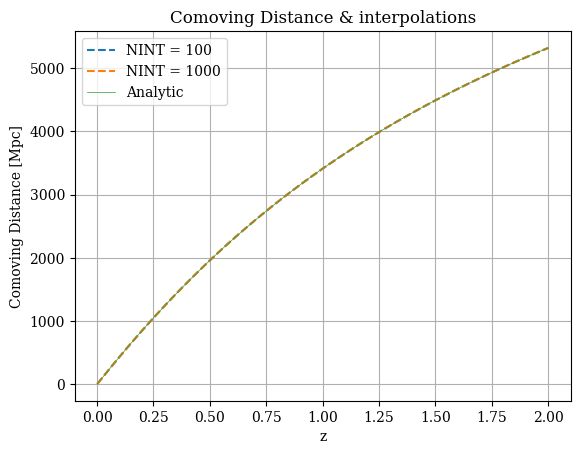

In [20]:
# plots interpolations

for i in range (len(NINT)):
    plt.plot(z_new,CD_list[i], label='NINT = '+str(NINT[i]), linestyle='--',linewidth=1.5)
plt.title('Comoving Distance & interpolations')
plt.plot(z_new,func_CD(z_new), label='Analytic', linewidth=0.5)
plt.xlabel('z')
plt.ylabel('Comoving Distance [Mpc]')
plt.grid()
plt.legend()


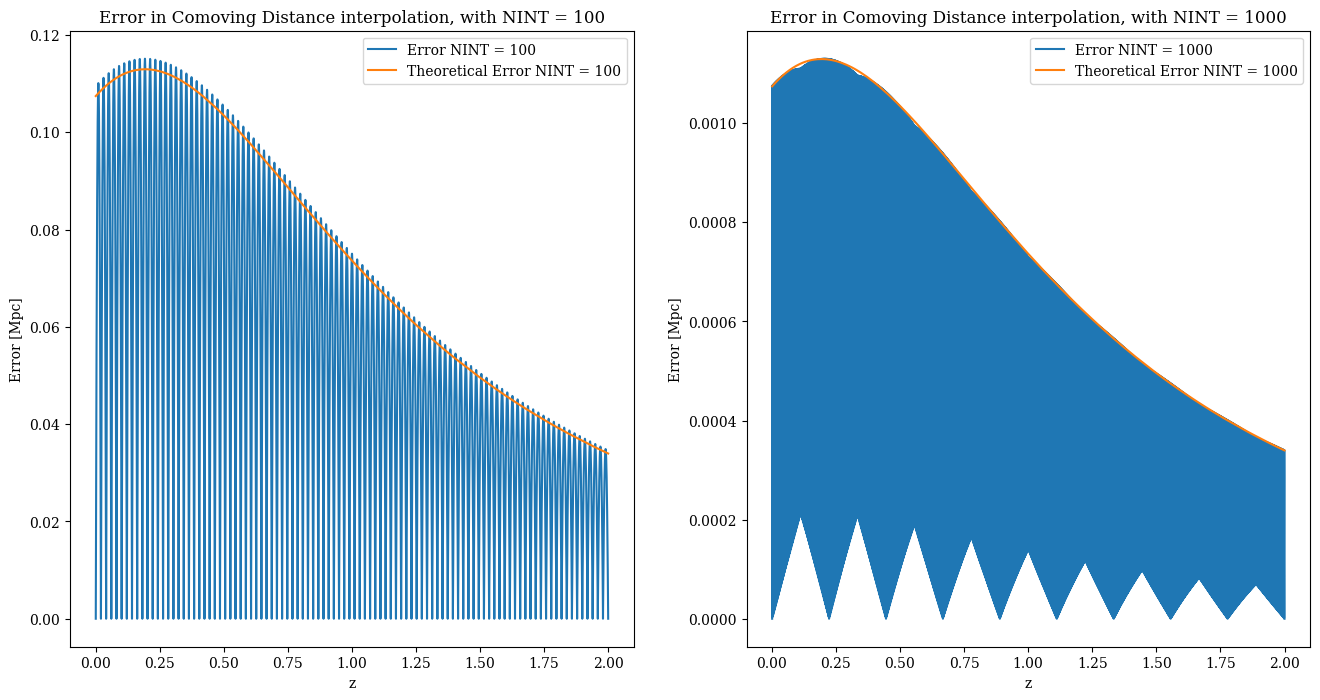

In [10]:
#plot errors

fig, ax = plt.subplots(1,2,figsize=(16,8))

for i in range (0,len(NINT)):
    ax[i].plot(z_new,err_list[i], label='Error NINT = '+str(NINT[i]))
    ax[i].plot(z_new,err_list_th[i], label='Theoretical Error NINT = '+str(NINT[i]))
    ax[i].set_title('Error in Comoving Distance interpolation, with NINT = '+str(NINT[i]))
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Error [Mpc]')
    ax[i].legend()
